<a href="https://colab.research.google.com/github/BuiLamPhong/Homework_Ai/blob/main/Nhandangtienviet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount( '/content/gdrive' )

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


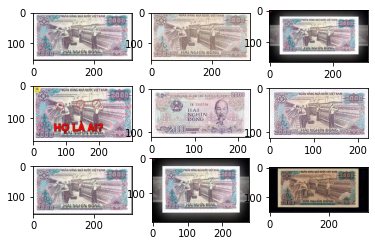

In [11]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/gdrive/MyDrive/Colab Notebooks/10_loaitien/'
for i in range(9):
  plt.subplot(330 + i +1)
  filename = folder + '2k_0' + str(i + 1) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [12]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array
folder = "/content/gdrive/MyDrive/Colab Notebooks/10_loaitien/"
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('100k_'):
    output = 0.0
  elif file.startswith('10k_'):
    output = 1.0
  elif file.startswith('1k_'):
    output = 2.0
  elif file.startswith('2k_'):
    output = 3.0
  elif file.startswith('5k_'):
    output = 4.0
  elif file.startswith('20k_'):
    output = 5.0
  elif file.startswith('50k_'):
    output = 6.0
  elif file.startswith('200k_'):
    output = 7.0
  elif file.startswith('500k_'):
    output = 8.0
  photo = load_img(folder + file, target_size=(200,200))
  photo = img_to_array(photo)  # O dong nay anh da bi thay doi.
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('money.npy', photos)
save('money.npy', labels)

(114, 200, 200, 3) (114,)


In [17]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200,200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(9, activation='softmax'))

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(photos, labels, batch_size=64,epochs=30, verbose=1)
model.save('Money_model.h5')
classes = ["1k_","2k_","5k_","10k_","20k_","50k_","100K_","200K_","500k_"]

Epoch 1/30
2/2 [==============================] - 9s 3s/step - loss: 666.4392 - accuracy: 0.1053
Epoch 2/30
2/2 [==============================] - 8s 3s/step - loss: 780.1442 - accuracy: 0.1053
Epoch 3/30
2/2 [==============================] - 8s 3s/step - loss: 486.1111 - accuracy: 0.0877
Epoch 4/30
2/2 [==============================] - 8s 3s/step - loss: 173.0170 - accuracy: 0.0965
Epoch 5/30
2/2 [==============================] - 8s 3s/step - loss: 23.4098 - accuracy: 0.1842
Epoch 6/30
2/2 [==============================] - 8s 3s/step - loss: 14.4613 - accuracy: 0.2193
Epoch 7/30
2/2 [==============================] - 8s 3s/step - loss: 7.9961 - accuracy: 0.2456
Epoch 8/30
2/2 [==============================] - 8s 3s/step - loss: 4.2799 - accuracy: 0.2719
Epoch 9/30
2/2 [==============================] - 8s 3s/step - loss: 2.1593 - accuracy: 0.3421
Epoch 10/30
2/2 [==============================] - 8s 3s/step - loss: 1.6959 - accuracy: 0.4474
Epoch 11/30
2/2 [======================

[[0.11084913 0.11599826 0.1120088  0.11245749 0.10663739 0.10763755
  0.11229118 0.11246775 0.1096524 ]]
[1]
2k_


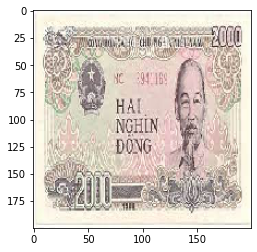

In [24]:
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/gdrive/MyDrive/Colab Notebooks/10_loaitien/2k_10.jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
print(y_classes)
print(classes[y_classes[0]])

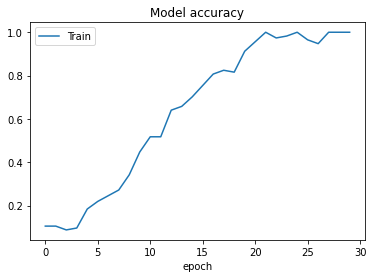

In [19]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()